In [1]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv

# Preprocessing
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.model_selection import cross_val_score

# Load the model

In [2]:
from sklearn.externals import joblib

# Save to file in the current working directory
joblib_file = "pickle_model_2.pkl"
#joblib.dump(model, joblib_file)

# Load from file
joblib_model = joblib.load(joblib_file)


In [3]:
import pandas as pd
df = pd.read_csv('data.csv')
df = df.drop(['filename'],axis=1)
instru_list = df.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(instru_list)

scaler = StandardScaler()
X = scaler.fit_transform(np.array(df.iloc[:, :-1], dtype = float))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
import librosa
import librosa.display

# Give the input

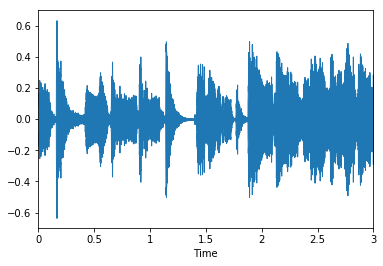

In [119]:
x, fs = librosa.load('D:/PGDBA/ISI/CDS/Project/demo/[org][jaz_blu]1044__2.wav', sr = None)
librosa.display.waveplot(x, sr =fs)

In [131]:
### Spectrogram

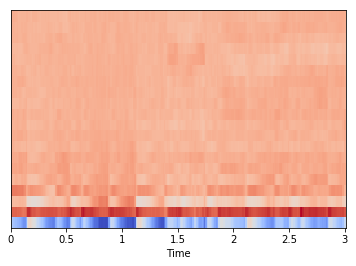

In [132]:
mfccs = librosa.feature.mfcc(x, sr=fs)
#mfccs = librosa.feature.mfcc(x, sr=fs,n_mfcc=13)
#print(mfccs.shape)
librosa.display.specshow(mfccs, sr=fs, x_axis='time')

### Play audio file

In [98]:
import IPython
IPython.display.Audio(x, rate=fs)

### Create features and standardise

In [241]:
y, sr = librosa.load('D:/PGDBA/ISI/CDS/Project/demo/piano_1.wav', sr =44100)
rms = librosa.feature.rms(y=y)
spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
zcr = librosa.feature.zero_crossing_rate(y)
mfcc = librosa.feature.mfcc(y=y, sr=sr)
to_append= []
to_append.append(np.mean(rms))
to_append.append(np.mean(spec_cent))
to_append.append(np.mean(spec_bw))
to_append.append(np.mean(rolloff))
to_append.append(np.mean(zcr))
for e in mfcc:
    to_append += {np.mean(e)}
to_append.append('y')

In [242]:
df.loc[df.shape[0]] =  to_append

In [243]:
scaler = StandardScaler()

X = scaler.fit_transform(np.array(df.iloc[:, :-1], dtype = float))
#X = scaler.fit_transform(np.array(to_append, dtype = float))

In [244]:
def pred_label(ans):
    if(ans == 0):
        return "Flute"
    elif(ans == 1):
        return 'GuitarAccoustic'
    elif(ans == 2):
        return 'Organ'
    elif(ans == 3):
        return 'Piano'
    elif(ans == 4):
        return 'Trumpet'
    else:
        return "HumanVoice"

In [245]:
predicted_labels = joblib_model.predict(X)
ans = predicted_labels[-1]

### Prediction of Output

In [246]:
print(pred_label(ans))

Piano


# Questions